# Задание

* Попробовать найти и показать различные инсайты в этом датасете с помощью графиков Seaborn, Matplotlib и Plotly
* Дополнить графики комментариями

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.0f' % x)
from pylab import rcParams
from collections import Counter

In [3]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df0 = df
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan
1,49,NaN,Mega,81,0,0,0,0,3273,0,0,0,3273,4280,4716,0,0,0,0,0,0,0,0,0,nan,nan,nan,29
2,56,NaN,Mega,81,0,0,0,0,6250,6,5128,0,6250,10312,10240,0,0,0,0,0,0,0,0,0,nan,855,0,1973
3,47,NaN,Mega,81,0,0,0,0,14355,0,0,0,14355,15087,13906,0,0,0,0,0,0,0,0,0,nan,nan,nan,364
4,74,NaN,Mega,81,0,0,0,0,91512,0,0,0,91512,93649,96090,0,0,0,0,0,0,0,0,0,nan,nan,nan,6651


In [4]:
df.city_type.unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [6]:
df.describe()

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,3820,32128,31515,47569
mean,42,54,12881,60337,81265,70023,68608,105,220741,26008,55139,92802,65557,60312,76231,71123,75347,88751,78912,55562,65095,55344,18,5279,338,12054
std,13,47,187451,201756,286017,1679410,1748867,193,600802,435998,1698931,2754135,1899018,971410,1762953,1115035,275817,300407,274914,189689,211322,172516,269,15990,29370,45321
min,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,32,13,0,0,0,0,34,0,0,0,5,242,440,0,0,0,0,0,0,0,0,0,0,814,0,270
50%,40,37,0,0,0,0,760,14,35001,0,222,3656,3025,0,0,0,0,0,0,0,0,0,0,1716,0,1380
75%,51,81,0,0,0,0,8762,122,260324,31620,3610,21558,12953,0,0,0,0,0,3869,0,0,0,0,4417,2,9782
max,98,236,14675680,7354568,14675680,330500000,247447375,2970,36341048,90600000,247447375,446167594,310319997,133260000,347350000,161657875,14675680,14811995,15023911,5646888,7501889,4112823,12521,1749500,5000000,4691796


In [7]:
df.describe(include = 'object')

,gender,city_type
count,49277,50000
unique,2,5
top,М,<100
freq,25403,15421


In [8]:
df.columns

Index(['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income', 'min_casa_balance_1q', 'max_casa_balance_1q',
       'avg_casa_balance_1Y', 'min_td_balance_1q', 'max_td_balance_1q',
       'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q',
       'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q',
       'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance',
       'nbi'],
      dtype='object')

In [9]:
for col in df.columns:
    print(col)
    print (df[col].unique())
    print ('\n')

age
[71 49 56 47 74 72 46 62 39 36 19 20 51 50 32 28 21 59 30 68 37 52 53 61
 38 57 29 41 60 42 27 31 35 54 40 26 25 44 23 18 55 33 48 43 24 65 34 58
 14 45 22 67 69 17 64 63 70 66 16  8 85 88 78 77 82 79 73 15 87 76 81 80
 91 75 83 86 90 98 84 89 13  9  4 10]


gender
[nan 'М' 'F']


city_type
['<100' 'Mega' '100-500' '1M+' '500-1000']


full_mob
[103  81  50  56  13 154 165  40   3  37 156  63  52  10 152  26   9  78
  68  49 141  34  22   0 157  11  99  29 108  90  27   1  75  30  84 117
  54  74  79 105  42  12  16   2  21  24  46  18  94  33  14 128  36  44
  80  35  67  62 102  41   6  23  53   5  85 158 104  25  39  15  20  88
  55  66  98  72   4  73   8 101 106 137  38 166  76   7  17 124  31  92
 134  93  19  58  89 135 123 139  70 167  69 160 120  32 111 145  28  51
  64  82 163 122  59 144 162  48 140  57 107 109  43 100 161 142 129  77
  86 151 121 148  61 118 159 115 125  65  60 110  91 150 132  95 164 136
 153 131 146  87  71 133 176 127  97 155 138  47 130  45 143 168 1

In [10]:
for col in df.columns:
    if df[col].isnull().sum()>0:
        print (df[col].isnull().sum(), '\t', df[col].isnull().sum() / len(df), '\t', col)

723 	 0.01446 	 gender
46180 	 0.9236 	 loan_to_deposit
17872 	 0.35744 	 Avg_trx
18485 	 0.3697 	 avgtrx_to_balance
2431 	 0.04862 	 nbi


In [11]:
# Можно заметить, что в датасете есть пропущенные значения по некоторым переменным
# Напр., переменная loan_to_deposit почти полностью не заполнена. Поэтому ее стоит исключить из анализа.
# По переменным gender и nbi процент пропущенных значений небольшой, поэтому данные наблюдения можно дропнуть.
# Переменные Avg_trx и avgtrx_to_balance имеют достаточно много миссингов, около 35%. Такая доля не позволяет 
# избавиться от них полностью. Соответственно, необходимо чем-то их заполнить. Возможно, подходящий вариант - 
# медиана относительно группировки город+пол+возраст. 
# По значениям переменных видно, что пропущенные значения определились корректно и "искусственных" миссингов нет.

In [12]:
df_new = df[(df['gender'].isnull()==False) & (df['nbi'].isnull()==False)]
df_new = df_new.drop(['loan_to_deposit'], axis=1).reset_index(drop = True)

In [13]:
df_new.shape

(46910, 27)

In [14]:
# Посмотрим на значения каждой из переменных и их количества

In [15]:
for col in df.columns:
    print(col)
    print (df[col].value_counts())
    print ('\n')

age
33    1571
31    1561
35    1545
34    1534
32    1508
      ... 
4        1
98       1
9        1
10       1
13       1
Name: age, Length: 84, dtype: int64


gender
М    25403
F    23874
Name: gender, dtype: int64


city_type
<100        15421
100-500     10727
Mega         8954
1M+          7908
500-1000     6990
Name: city_type, dtype: int64


full_mob
5      1519
3      1298
4      1234
81     1174
1      1103
       ... 
181       1
183       1
185       1
195       1
178       1
Name: full_mob, Length: 185, dtype: int64


ml_balance
0          49426
656867         1
834923         1
1783886        1
850506         1
           ...  
6916708        1
985148         1
364046         1
2623534        1
717779         1
Name: ml_balance, Length: 575, dtype: int64


cl_balance_0m
0          41767
1000000       17
500000         5
558659         5
446927         4
           ...  
383029         1
369470         1
771230         1
183840         1
792961         1
Name: cl_balance_

In [16]:
# Можно заметить, что для многих переменных самое частое значение - 0. Найдем долю нулей для каждой переменной.

In [17]:
for col in df.columns:
    print(col)
    print (len(df[df[col]==0])/len(df))
    print ('\n')

age
0.0


gender
0.0


city_type
0.0


full_mob
0.00926


ml_balance
0.98852


cl_balance_0m
0.83534


loan_balance_0m
0.77688


td_balance_0m
0.94444


casa_balance_0m
0.14088


dc_trx_cnt
0.35744


dc_trx_sum
0.35854


income
0.53562


min_casa_balance_1q
0.19354


max_casa_balance_1q
0.09766


avg_casa_balance_1Y
0.06874


min_td_balance_1q
0.94712


max_td_balance_1q
0.93974


avg_td_balance_1Y
0.9236


min_loan_balance_1q
0.79166


max_loan_balance_1q
0.7596


avg_loan_balance_1Y
0.73736


min_cl_balance_1q
0.8444


max_cl_balance_1q
0.82604


avg_cl_balance_1Y
0.80906


loan_to_deposit
0.0695


Avg_trx
0.0011


avgtrx_to_balance
0.0011


nbi
0.0




In [18]:
# Список переменных, в которых большинство значений = 0:
# 'ml_balance', 
# 'cl_balance_0m',
# 'loan_balance_0m', 
# 'td_balance_0m', 
# 'min_td_balance_1q', 
# 'max_td_balance_1q',       
# 'avg_td_balance_1Y', 
# 'min_loan_balance_1q', 
# 'max_loan_balance_1q',       
# 'min_cl_balance_1q', 
# 'max_cl_balance_1q',       
# 'avg_cl_balance_1Y', 
# 'avgtrx_to_balance'     
# 
# В основном это агрегированные значения, связанные с балансами кредитов / депозитов
# Однако, к примеру, по переменной income заполненность около 50%. 
# В целом это позволяет предположить, что данные собраны не очень качественно.

In [19]:
# выделим колонки, в которых большая часть значений - 0

df_0_cols = ['ml_balance', 'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m', 'min_td_balance_1q', 
 'max_td_balance_1q', 'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q',       
 'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q', 'avg_cl_balance_1Y', 'avgtrx_to_balance']


In [20]:
# Несмотря на то, что в них может содержаться важная информация, в дальнейшем анализе
# данные переменные использовать не будем.
# Также ограничимся только теми наблюдениями, по которым значение income > 0.

In [21]:
df_new = df_new[df_new['income'] > 0]

In [22]:
df2 = df_new.reset_index(drop = True)

In [23]:
df2.shape

(21767, 27)

In [24]:
cols = [col for col in df2.columns if col not in df_0_cols]
df3 = df2[cols].reset_index(drop = True)

In [25]:
df3.columns

Index(['age', 'gender', 'city_type', 'full_mob', 'casa_balance_0m',
       'dc_trx_cnt', 'dc_trx_sum', 'income', 'min_casa_balance_1q',
       'max_casa_balance_1q', 'avg_casa_balance_1Y', 'Avg_trx', 'nbi'],
      dtype='object')

In [26]:
df3

,age,gender,city_type,full_mob,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,Avg_trx,nbi
0,36,М,<100,154,0,83,324948,22100,0,10194,893,3915,6065
1,56,F,<100,165,1525,341,451482,36694,1471,1545,5845,1324,8010
2,19,М,100-500,40,20,72,15530,1294,1,80,217,216,684
3,20,F,1M+,3,10338,105,126230,44169,4700,29150,19043,1202,158
4,51,М,100-500,37,8738,189,783517,62108,8738,47912,31657,4146,3054
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21762,59,М,500-1000,51,42517,299,951132,64957,20308,76183,26895,3181,4861
21763,18,F,100-500,3,1597,6,3811,1365,6,1597,801,635,236
21764,45,F,<100,6,2679,195,101016,22019,2679,9365,4100,518,744
21765,34,М,1M+,21,6451,73,118358,12406,3796,7544,9010,1621,1973


In [27]:
cut_columns = ['age', 'full_mob', 'casa_balance_0m',
       'dc_trx_cnt', 'dc_trx_sum', 'income', 'min_casa_balance_1q',
       'max_casa_balance_1q', 'avg_casa_balance_1Y', 'Avg_trx', 'nbi']

In [28]:
# Посмотрим на распределения оставшихся переменных.
# Вид графиков позволяет сделать вывод, что во многих переменных присутствуют выбросы.

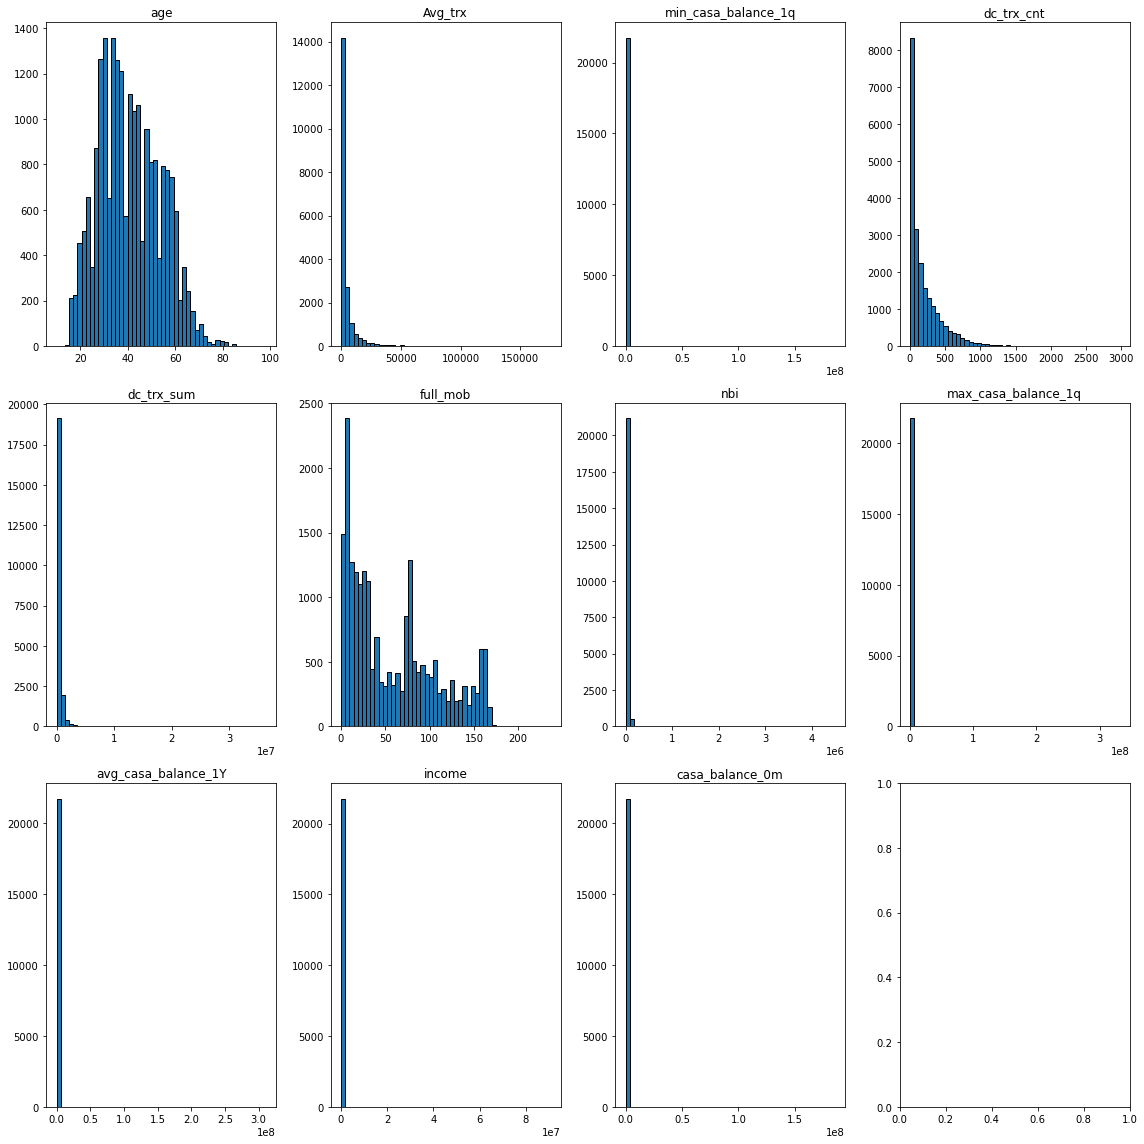

In [29]:

fig, axes = plt.subplots(nrows=3,ncols=4, figsize=(16,16))

i = 0
j = 0

for col in cut_columns:
    
    ax = axes[i, j];

    ax.hist(df3[col], bins=50, edgecolor='black')
    
    ax.set_title(col)
    
    if i<2:
        i +=1
    else: i = 0
    
    if j<3:
        j +=1
    else: j = 0

plt.tight_layout()
plt.show();

In [30]:
# Очистим датасет от выбросов используя интерквартильный размах по каждой переменной

In [31]:
n = 0 #In this case, we considered outliers as rows that have at least two outlied numerical values (n=2)

indexes = []  
    
for col in df3.select_dtypes(include=np.number): 
    
    Q1 = np.percentile(df3[col], 25) 
    Q3 = np.percentile(df3[col], 75) 
    IQR = Q3 - Q1 
 
    limit = 1.5 * IQR 
 
    list_outliers = df3[(df3[col] < Q1 - limit) | (df3[col] > Q3 + limit )].index # Determine a list of indices of outliers for feature col 
    
    indexes.extend(list_outliers) # append the found outlier indices for col to the list of outlier indices 
 
indexes = Counter(indexes) 
multiple_outliers = list( k for k, v in indexes.items() if v > n )


In [32]:
df3.drop(multiple_outliers, axis = 0) 
 
df4 = df3.drop(multiple_outliers, axis = 0).reset_index(drop=True) 

In [33]:
df4.shape

(14235, 13)

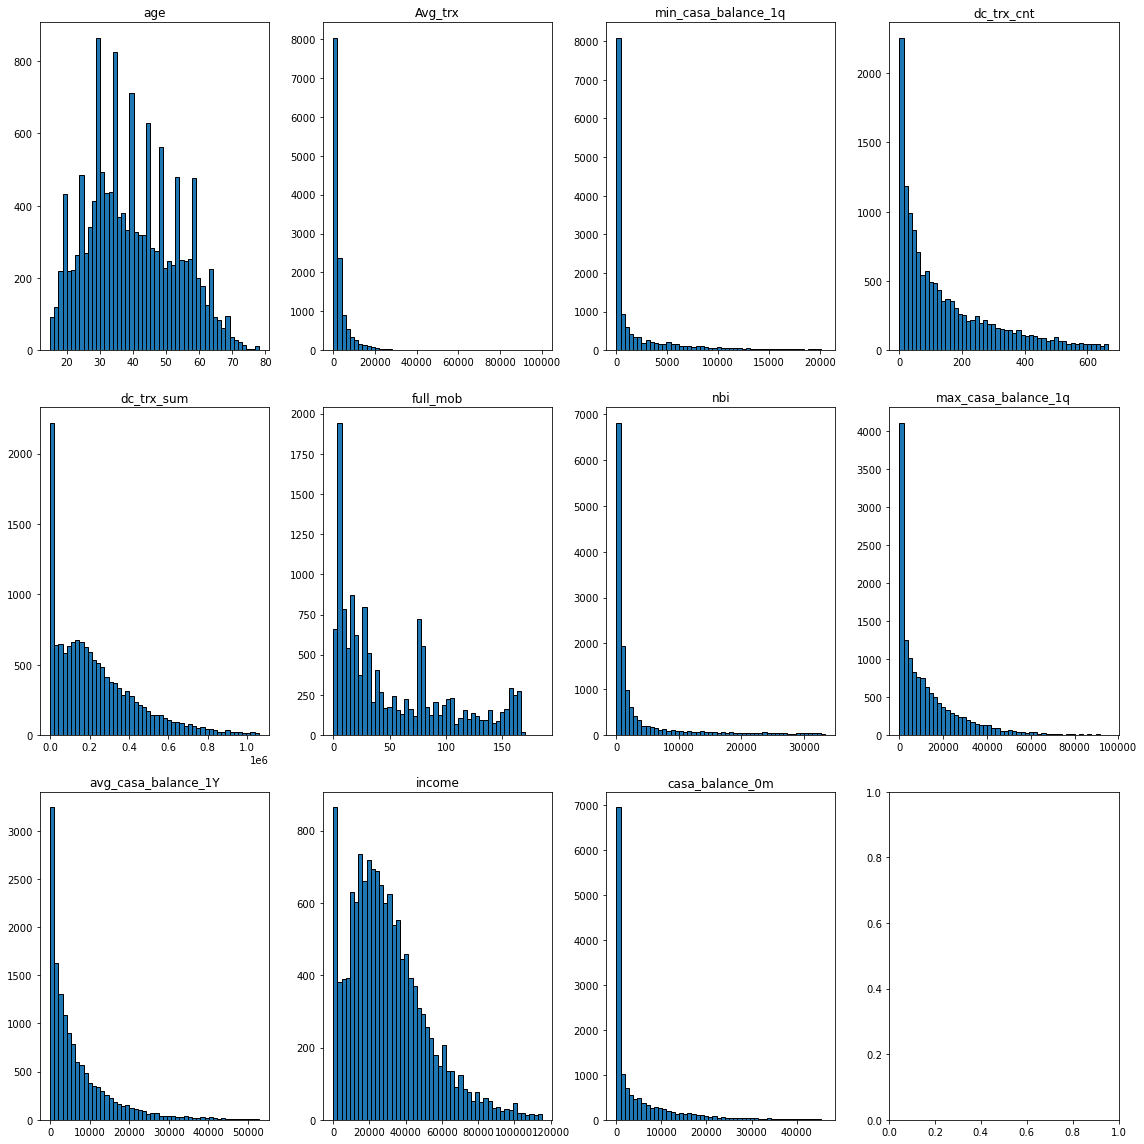

In [34]:
fig, axes = plt.subplots(nrows=3,ncols=4, figsize=(16,16))

i = 0
j = 0

for col in cut_columns:
    
    ax = axes[i, j];
    
    ax.hist(df4[col], bins=50, edgecolor='black')
    
    ax.set_title(col)
    
    if i<2:
        i +=1
    else: i = 0
    
    if j<3:
        j +=1
    else: j = 0

plt.tight_layout()
plt.show();

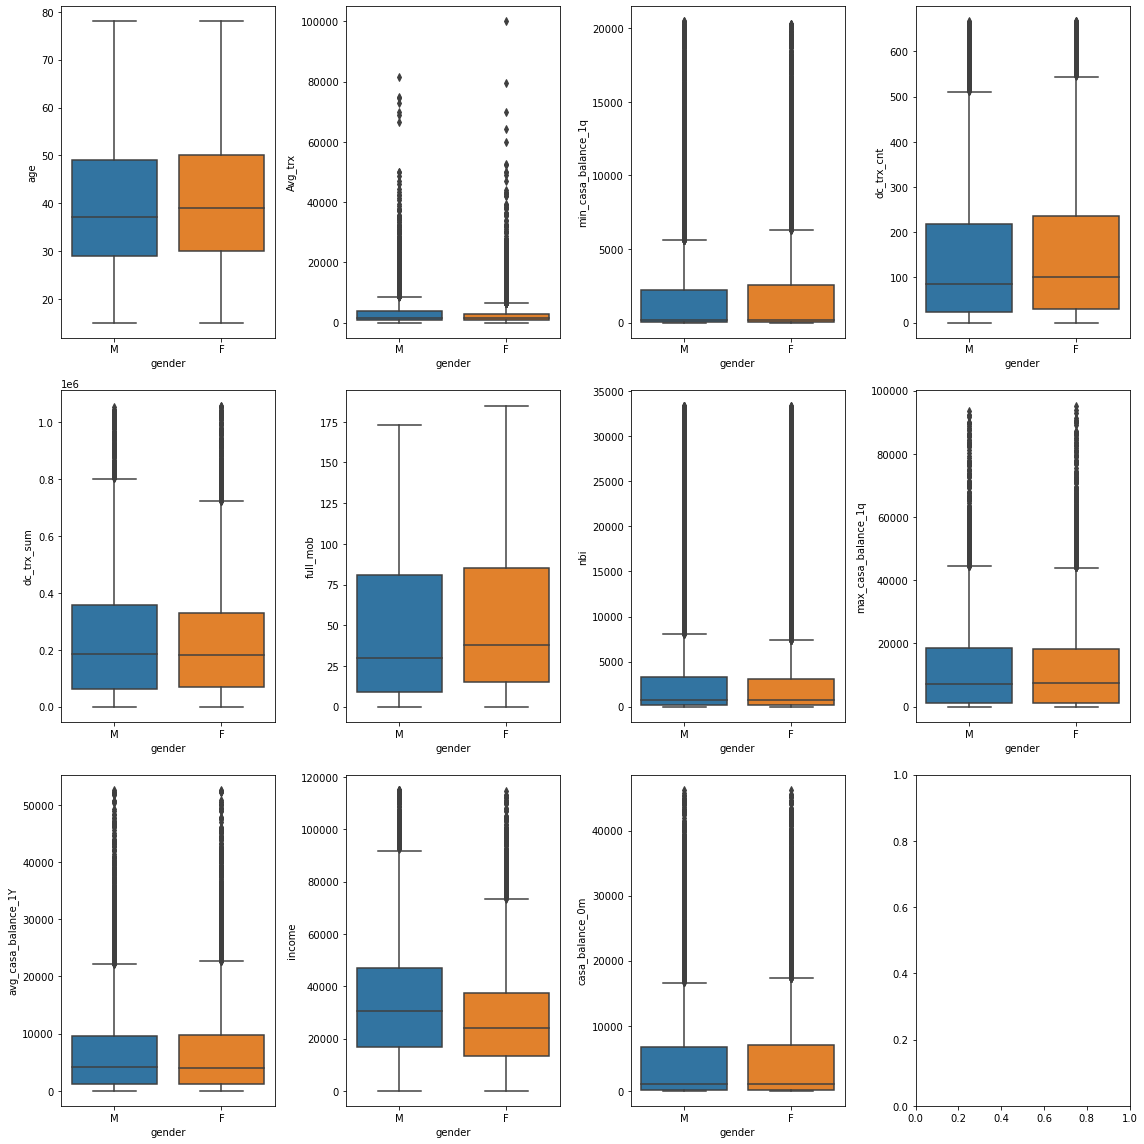

In [35]:
fig, ax = plt.subplots(nrows=3,ncols=4, figsize=(16,16))

i = 0
j = 0

for col in cut_columns:
    sns.boxplot(x="gender", y=col, data=df4, ax = ax[i, j] );
    if i<2:
        i +=1
    else: i = 0
    
    if j<3:
        j +=1
    else: j = 0

plt.tight_layout()
plt.show();

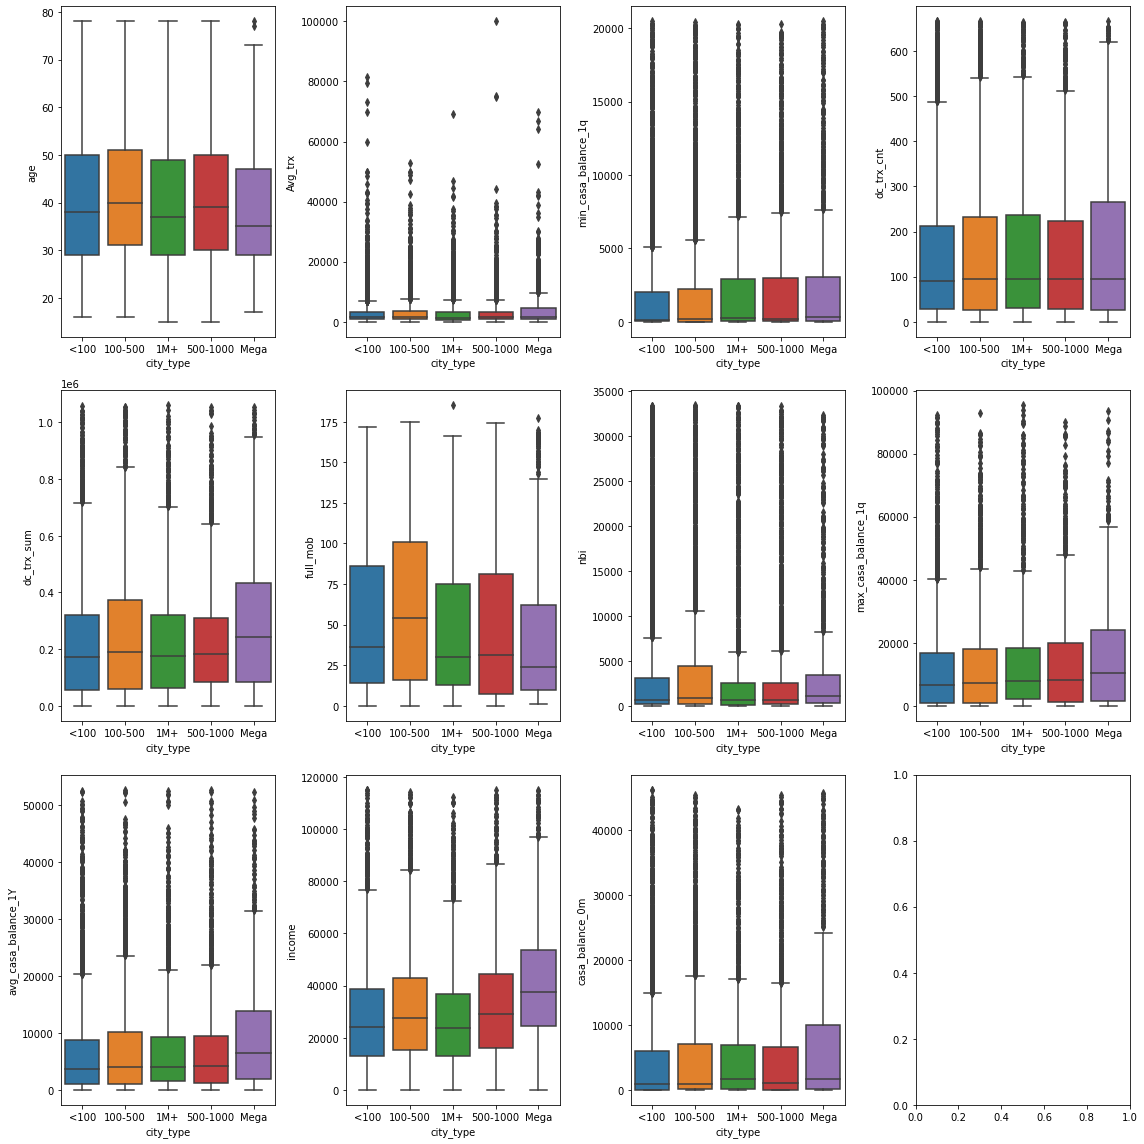

In [36]:
fig, ax = plt.subplots(nrows=3,ncols=4, figsize=(16,16))

i = 0
j = 0

for col in cut_columns:
    sns.boxplot(x="city_type", y=col, data=df4, ax = ax[i, j] );
    if i<2:
        i +=1
    else: i = 0
    
    if j<3:
        j +=1
    else: j = 0

plt.tight_layout()
plt.show();

In [37]:
corr = df.corr()

corr_cut = df4.corr()

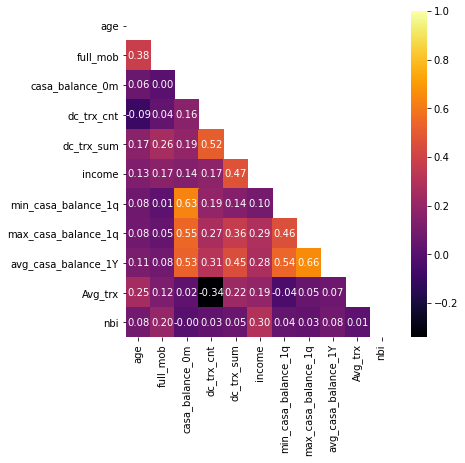

In [39]:
rcParams['figure.figsize']= 6,6


mask = np.zeros_like(corr_cut)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_cut, mask=mask, vmax=1, annot=True, fmt='.2f', cmap="inferno")
plt.show();

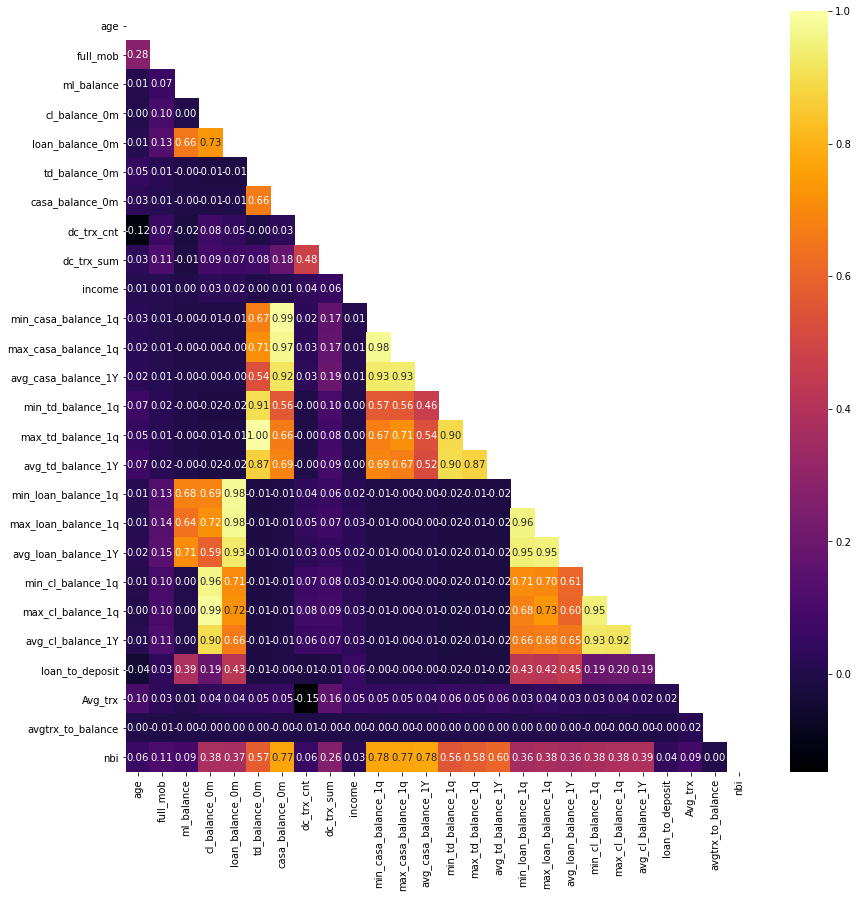

In [38]:
rcParams['figure.figsize']= 14,14


mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=1, annot=True, fmt='.2f', cmap="inferno")
plt.show();

In [40]:
df3.columns

Index(['age', 'gender', 'city_type', 'full_mob', 'casa_balance_0m',
       'dc_trx_cnt', 'dc_trx_sum', 'income', 'min_casa_balance_1q',
       'max_casa_balance_1q', 'avg_casa_balance_1Y', 'Avg_trx', 'nbi'],
      dtype='object')

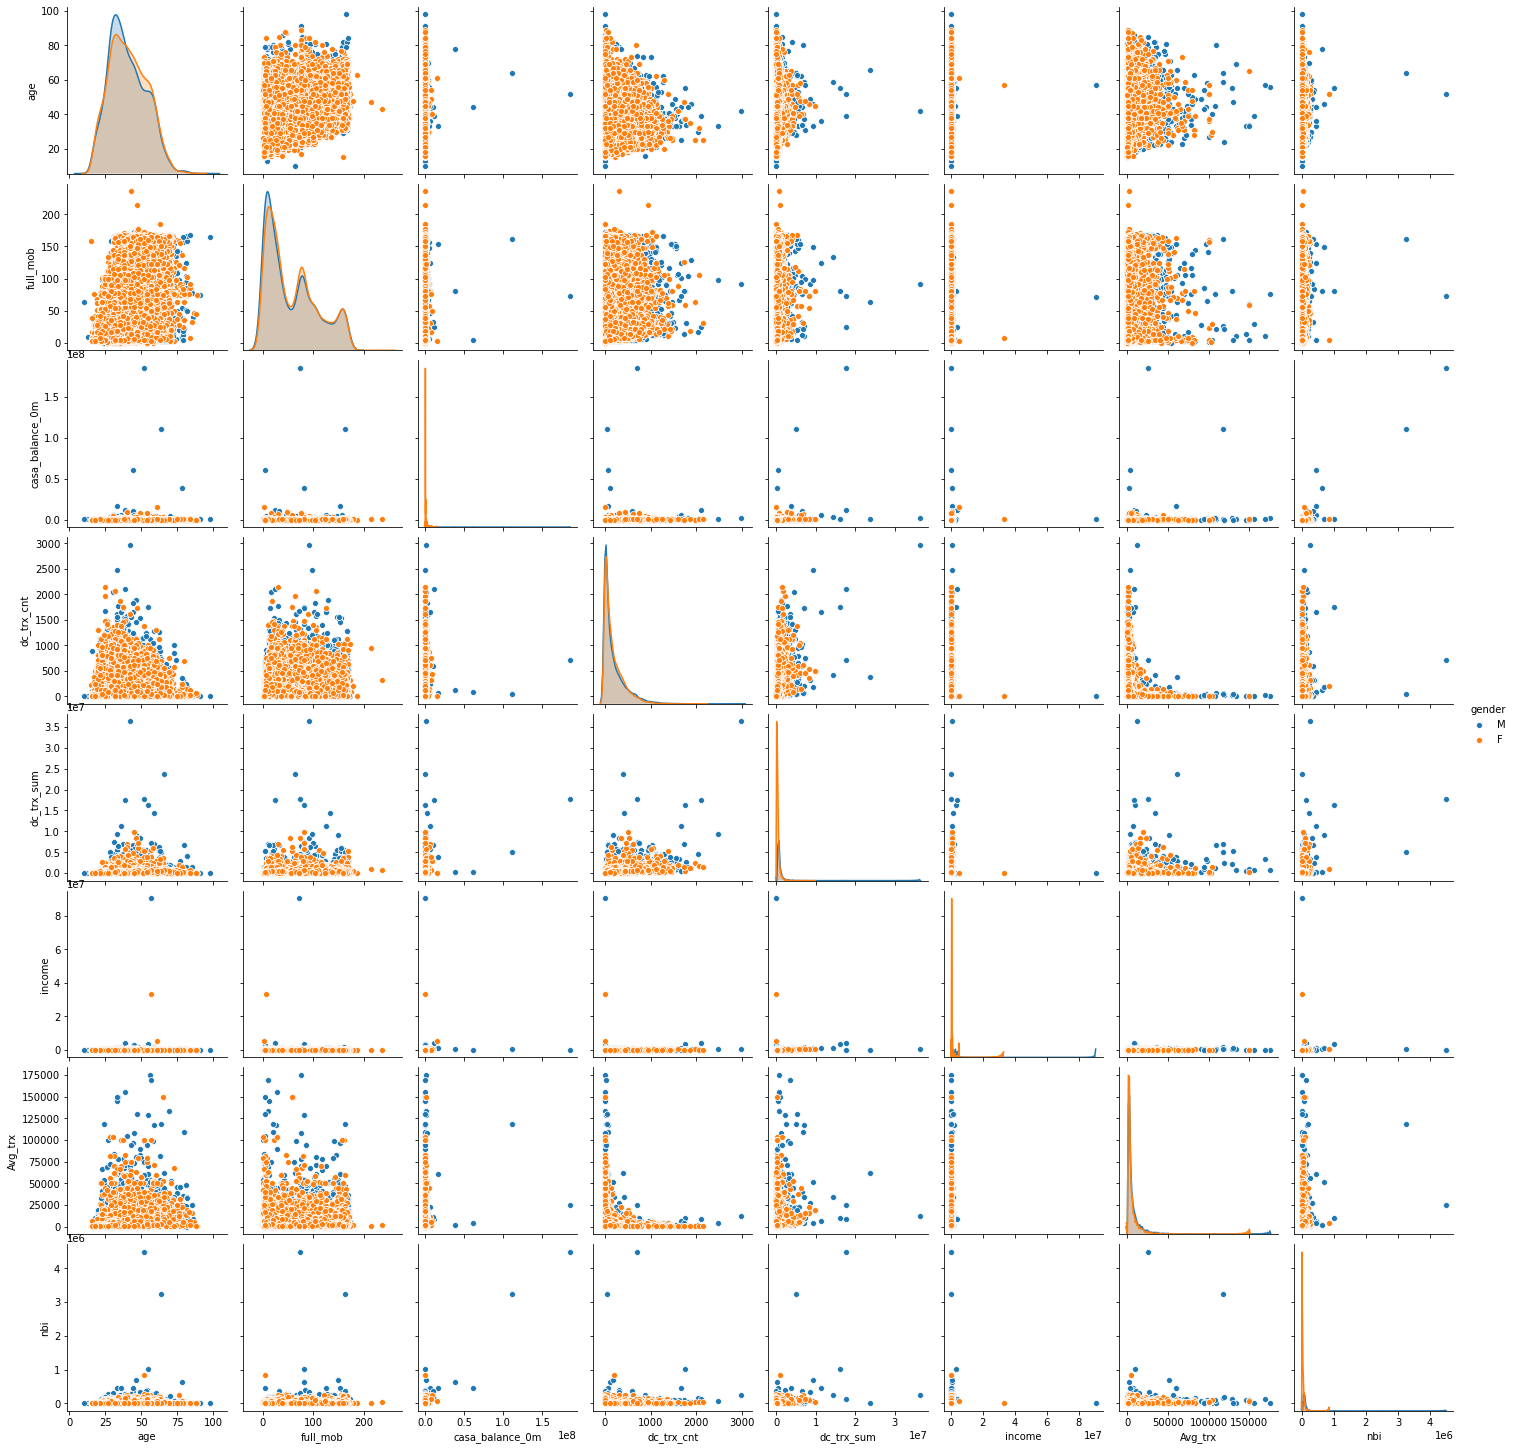

In [41]:


sns.pairplot(
    df3[['age', 'gender', 'full_mob', 'casa_balance_0m', 'dc_trx_cnt', 'dc_trx_sum', 'income', 'Avg_trx', 'nbi']],
    hue='gender'
    #kind='reg'
)
plt.show();